In [4]:
from pareto_analysis import *

### 3-class

In [5]:
file_path = "/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/configuration_selection/3-class nested cross-validation.csv"


Parsing cross-validation results...
Successfully parsed 45 configurations

Comparing Pareto algorithms...

=== PARETO FRONTIER ANALYSIS FOR F1 ===
Total configurations: 45
Using corrected Pareto algorithm
Pareto optimal configurations: 6

PARETO OPTIMAL CONFIGURATIONS:
----------------------------------------
 1. 5s_0.5 + XGB
    F1: 0.5396 ± 0.0900
    CV: 0.167 | Distance from ideal: 1.000

 2. 2s_0.5 + XGB
    F1: 0.5272 ± 0.0607
    CV: 0.115 | Distance from ideal: 0.627

 3. 2s + RF
    F1: 0.5202 ± 0.0594
    CV: 0.114 | Distance from ideal: 0.617

 4. 3s_0.8 + XGB
    F1: 0.5123 ± 0.0297
    CV: 0.058 | Distance from ideal: 0.278

 5. 3s_0.5 + RF
    F1: 0.5122 ± 0.0252
    CV: 0.049 | Distance from ideal: 0.234

 6. 4s_0.5 + DT
    F1: 0.3750 ± 0.0124
    CV: 0.033 | Distance from ideal: 1.000

SELECTION STRATEGIES FROM PARETO FRONTIER:
--------------------------------------------------

CLOSEST TO IDEAL:
  1. 3s_0.5 + RF: 0.5122 ± 0.0252
  2. 3s_0.8 + XGB: 0.5123 ± 0.0297
  3.

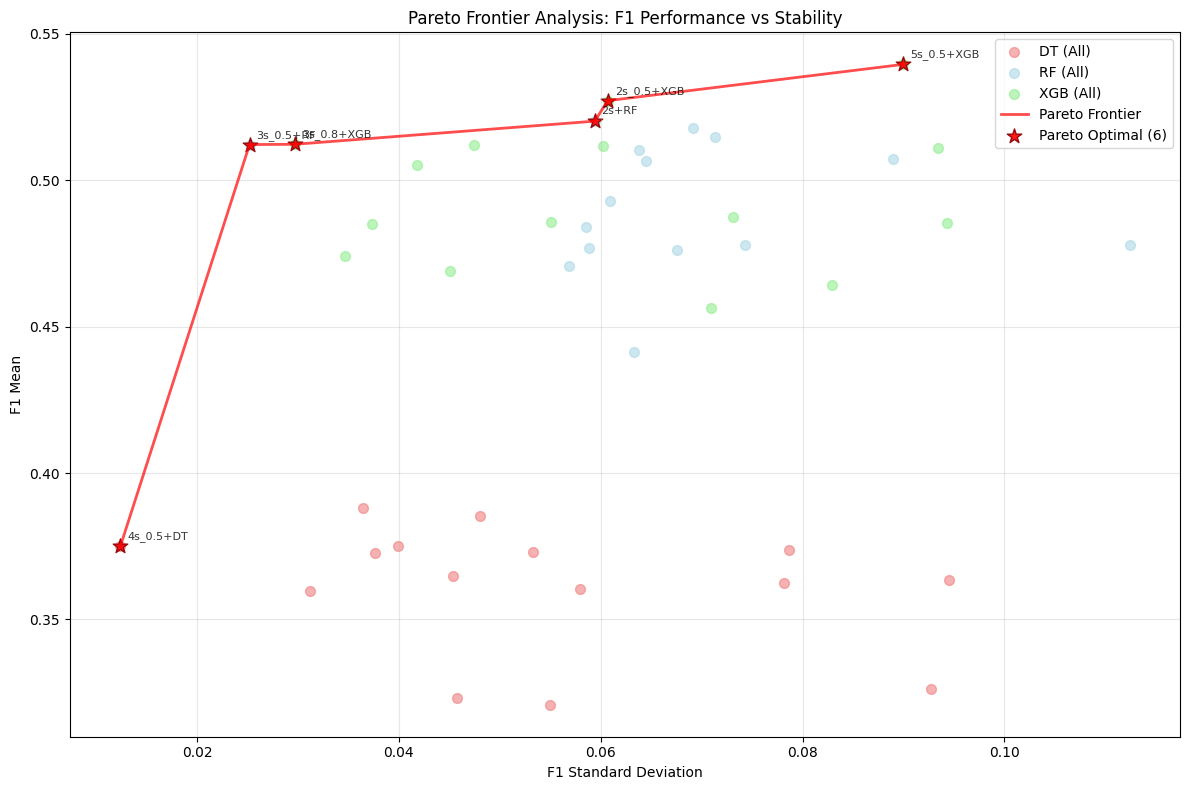

In [6]:
results = run_pareto_analysis(file_path, metric='f1')
best_configs = results['selections']['closest_to_ideal']

## 2 class

In [7]:
file_path = "/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/configuration_selection/2-class nested cross-validation.csv"

Parsing cross-validation results...
Successfully parsed 45 configurations

Comparing Pareto algorithms...

=== PARETO FRONTIER ANALYSIS FOR F1 ===
Total configurations: 45
Using corrected Pareto algorithm
Pareto optimal configurations: 3

PARETO OPTIMAL CONFIGURATIONS:
----------------------------------------
 1. 3s + RF
    F1: 0.7202 ± 0.0410
    CV: 0.057 | Distance from ideal: 1.000

 2. 5s_0.5 + XGB
    F1: 0.7098 ± 0.0298
    CV: 0.042 | Distance from ideal: 0.754

 3. 5s_0.5 + RF
    F1: 0.7058 ± 0.0267
    CV: 0.038 | Distance from ideal: 1.000

SELECTION STRATEGIES FROM PARETO FRONTIER:
--------------------------------------------------

CLOSEST TO IDEAL:
  1. 5s_0.5 + XGB: 0.7098 ± 0.0298
  2. 3s + RF: 0.7202 ± 0.0410
  3. 5s_0.5 + RF: 0.7058 ± 0.0267

HIGHEST MEAN:
  1. 3s + RF: 0.7202 ± 0.0410
  2. 5s_0.5 + XGB: 0.7098 ± 0.0298
  3. 5s_0.5 + RF: 0.7058 ± 0.0267

LOWEST STD:
  1. 5s_0.5 + RF: 0.7058 ± 0.0267
  2. 5s_0.5 + XGB: 0.7098 ± 0.0298
  3. 3s + RF: 0.7202 ± 0.0410

B

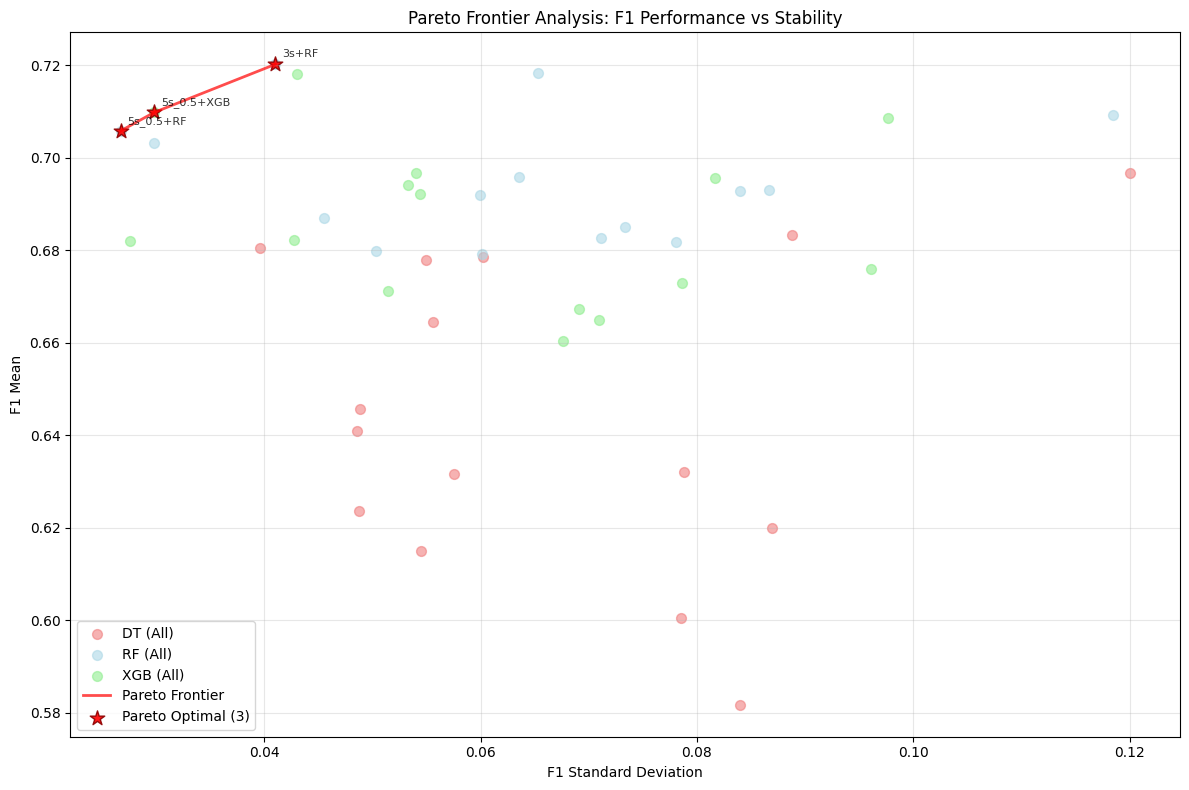

In [8]:
results = run_pareto_analysis(file_path, metric='f1')
best_configs = results['selections']['closest_to_ideal']

2-class global normalization

In [9]:
file_path = "/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/configuration_selection/2-class nested cross-validation; global normalization.csv"

Parsing cross-validation results...
Successfully parsed 45 configurations

Comparing Pareto algorithms...

=== PARETO FRONTIER ANALYSIS FOR F1 ===
Total configurations: 45
Using corrected Pareto algorithm
Pareto optimal configurations: 9

PARETO OPTIMAL CONFIGURATIONS:
----------------------------------------
 1. 5s + XGB
    F1: 0.8017 ± 0.0442
    CV: 0.055 | Distance from ideal: 1.000

 2. 3s + RF
    F1: 0.7953 ± 0.0426
    CV: 0.054 | Distance from ideal: 0.932

 3. 3s_0.8 + RF
    F1: 0.7942 ± 0.0408
    CV: 0.051 | Distance from ideal: 0.854

 4. 5s_0.5 + XGB
    F1: 0.7884 ± 0.0392
    CV: 0.050 | Distance from ideal: 0.789

 5. 3s_0.5 + RF
    F1: 0.7862 ± 0.0333
    CV: 0.042 | Distance from ideal: 0.539

 6. 1s_0.8 + RF
    F1: 0.7674 ± 0.0302
    CV: 0.039 | Distance from ideal: 0.459

 7. 3s + DT
    F1: 0.7071 ± 0.0236
    CV: 0.033 | Distance from ideal: 0.657

 8. 5s_0.5 + DT
    F1: 0.6977 ± 0.0222
    CV: 0.032 | Distance from ideal: 0.714

 9. 2s_0.5 + DT
    F1: 0.6

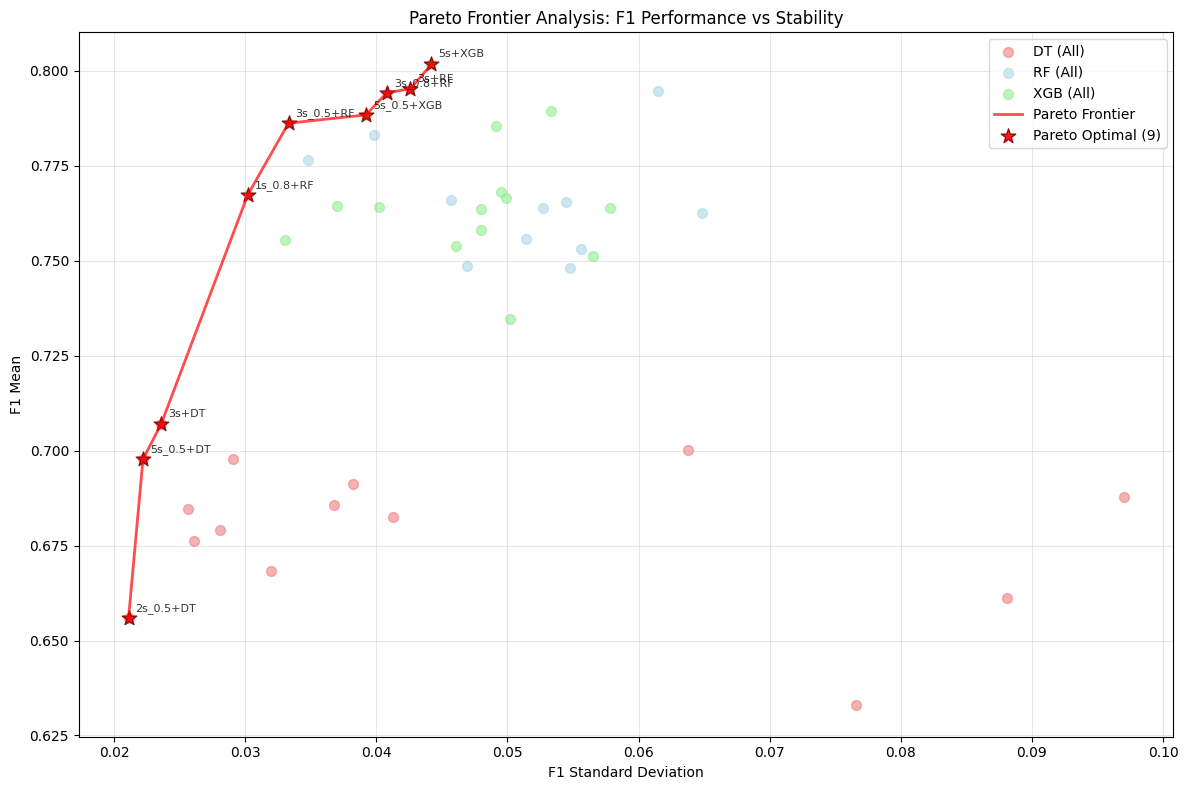

In [10]:
results = run_pareto_analysis(file_path, metric='f1')
best_configs = results['selections']['closest_to_ideal']

3-class global normalization

In [11]:
file_path = "/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/configuration_selection/3-class nested cross-validation; global normalization.csv"

Parsing cross-validation results...
Successfully parsed 45 configurations

Comparing Pareto algorithms...

=== PARETO FRONTIER ANALYSIS FOR F1 ===
Total configurations: 45
Using corrected Pareto algorithm
Pareto optimal configurations: 3

PARETO OPTIMAL CONFIGURATIONS:
----------------------------------------
 1. 3s + XGB
    F1: 0.7652 ± 0.0712
    CV: 0.093 | Distance from ideal: 1.000

 2. 3s + RF
    F1: 0.7611 ± 0.0580
    CV: 0.076 | Distance from ideal: 0.744

 3. 4s_0.8 + DT
    F1: 0.6188 ± 0.0198
    CV: 0.032 | Distance from ideal: 1.000

SELECTION STRATEGIES FROM PARETO FRONTIER:
--------------------------------------------------

CLOSEST TO IDEAL:
  1. 3s + RF: 0.7611 ± 0.0580
  2. 3s + XGB: 0.7652 ± 0.0712
  3. 4s_0.8 + DT: 0.6188 ± 0.0198

HIGHEST MEAN:
  1. 3s + XGB: 0.7652 ± 0.0712
  2. 3s + RF: 0.7611 ± 0.0580
  3. 4s_0.8 + DT: 0.6188 ± 0.0198

LOWEST STD:
  1. 4s_0.8 + DT: 0.6188 ± 0.0198
  2. 3s + RF: 0.7611 ± 0.0580
  3. 3s + XGB: 0.7652 ± 0.0712

BEST CV:
  1. 4s_

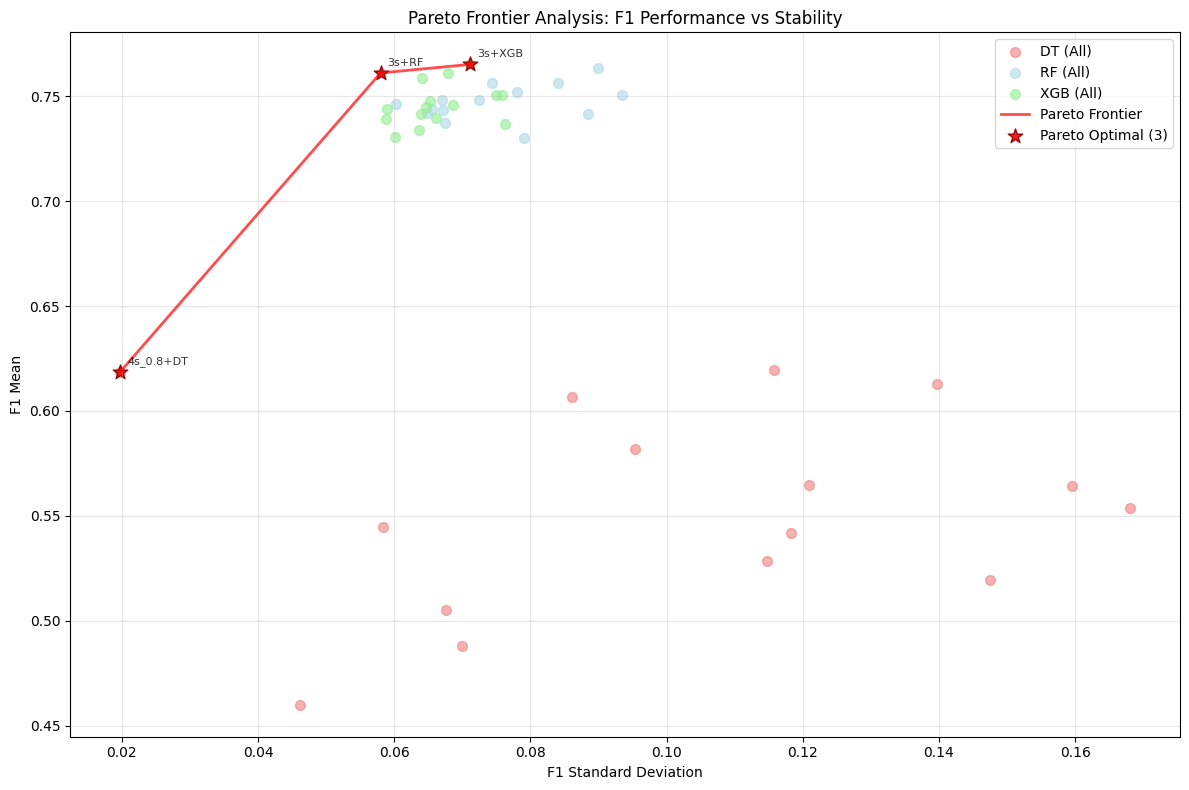

In [12]:
results = run_pareto_analysis(file_path, metric='f1')
best_configs = results['selections']['closest_to_ideal']